In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 9.1 Line Plot

### A. Football

In [2]:
# A. Make a dataframe called foot using the "./international_football_results.csv" file
#    Perform a few exploratory data analysis operations before working with the data set
foot = pd.read_csv("data/datasets/international_football_results.csv")
foot.shape

(39669, 9)

In [3]:
foot.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
foot['date'].dtype

dtype('O')

In [5]:
foot['new-date']=pd.to_datetime(foot['date'])
foot['new-date'].dtype

dtype('<M8[ns]')

In [6]:
foot['year'] = foot['new-date'].dt.year

In [7]:
foot[['date', 'new-date', 'year']].sample(5)

,date,new-date,year
4759,1960-10-23,1960-10-23,1960
14467,1987-06-21,1987-06-21,1987
7780,1971-08-05,1971-08-05,1971
5484,1963-12-15,1963-12-15,1963
8295,1972-10-28,1972-10-28,1972


In [8]:
foot['month'] = foot['new-date'].dt.month
foot['day'] = foot['new-date'].dt.day
foot['weekday'] = foot['new-date'].dt.weekday

In [9]:
foot[['date', 'new-date', 'year', 'month', 'day', 'weekday']].sample(5)

,date,new-date,year,month,day,weekday
11566,1981-03-05,1981-03-05,1981,3,5,3
31619,2009-11-15,2009-11-15,2009,11,15,6
20260,1997-04-02,1997-04-02,1997,4,2,2
26708,2004-08-22,2004-08-22,2004,8,22,6
11776,1981-08-03,1981-08-03,1981,8,3,0


In [10]:
# We'll use the .to_datetime method and .dt.year property to set the "year" column from a string to an integer
foot['year'] = pd.to_datetime(foot['date']).dt.year

### B. Games

In [11]:
# B. Let's chart how many games occured in each year:
foot['year'].value_counts().sort_values(ascending=False)

2008    1087
2011    1077
2004    1059
2000    1022
2001    1014
        ... 
1878       2
1874       1
1873       1
1875       1
1872       1
Name: year, Length: 147, dtype: int64

In [12]:
# The years are out of order! Fortunately, we can sort our column by its index with sort_index()
foot['year'].value_counts().sort_index()

1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2014     857
2015    1001
2016     918
2017     908
2018     390
Name: year, Length: 147, dtype: int64

<AxesSubplot:>

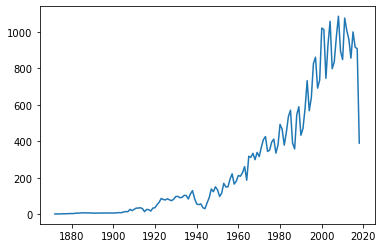

In [13]:
# Finally, we're ready to plot the change over time with .plot()
foot['year'].value_counts().sort_index().plot()

In [14]:
foot = foot[foot['year']>1990]

In [15]:
foot.shape

(23444, 14)

<AxesSubplot:>

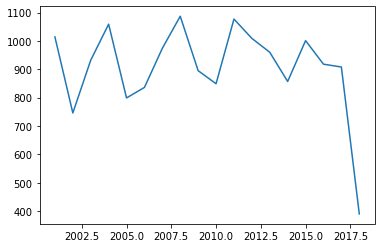

In [16]:
foot[foot['year']>2000]['year'].value_counts().sort_index().plot()

# 9.2 Bar Charts

In [17]:
foot['country'].value_counts()

USA                         953
France                      486
South Africa                441
Qatar                       368
United Arab Emirates        347
                           ... 
Tahiti                        2
Turks and Caicos Islands      2
Afghanistan                   2
Mayotte                       2
Micronesia FS                 1
Name: country, Length: 234, dtype: int64

<AxesSubplot:>

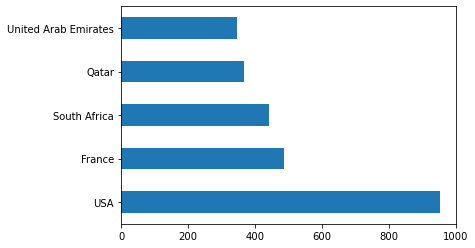

In [18]:
# A. Let's see how many games each country played, represented as a bar chart
foot['country'].value_counts().head(5).plot(kind="barh")

<AxesSubplot:>

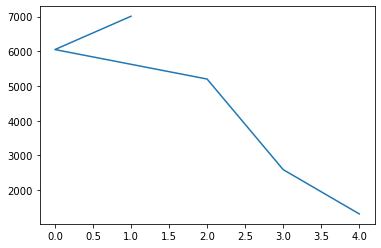

In [19]:
# B. Now let's plot the occurence of specific scores for the home team
foot['home_score'].value_counts().head().plot()

<AxesSubplot:>

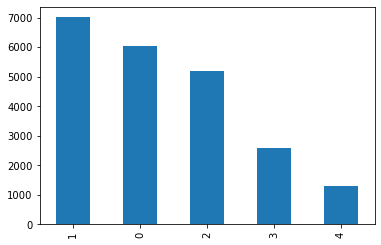

In [20]:
foot['home_score'].value_counts().head().plot(kind="bar")

<AxesSubplot:>

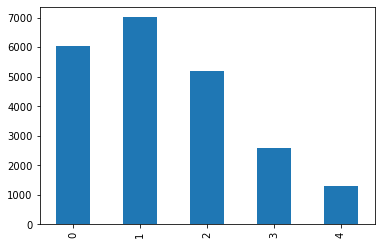

In [21]:
# C. Instead of sorting from highest to lowest value, let's sort the x axis in ascending order
foot['home_score'].value_counts().sort_index().head().plot(kind="bar")

<AxesSubplot:>

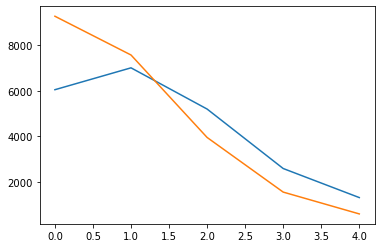

In [22]:
foot['home_score'].value_counts().sort_index().head().plot(kind="line")
foot['away_score'].value_counts().sort_index().head().plot(kind="line")

<AxesSubplot:>

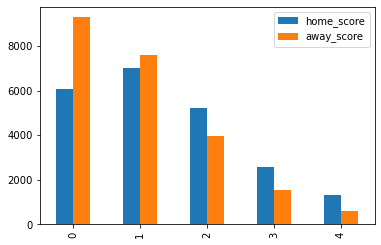

In [23]:
# BONUS: Compare the home_score and away_score value counts to analyze home field advantage
# You will need to use the .apply method to use value_counts on each column of a dataframe
foot[['home_score', 'away_score']].apply(pd.Series.value_counts).head().plot(kind="bar")

<AxesSubplot:>

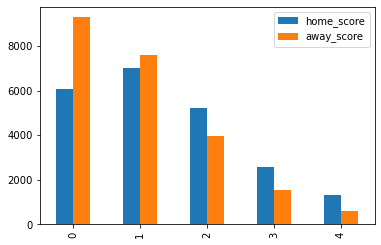

In [24]:
foot[['home_score', 'away_score']].apply(pd.Series.value_counts).head().plot(kind="bar")

### 9.3 Histograms

In [25]:
# A. Let's start with a new dataset. Create a dataframe called choc from the './chocolate_reviews.csv' file
#    Inspect the data using some exploratory data analysis methods
choc = pd.read_csv('data/datasets/chocolate_ratings.csv')
choc.columns



Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [26]:
choc.shape

(1795, 9)

In [27]:
choc.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [28]:
pd.DataFrame(choc.dtypes, columns=["DataType"])

,DataType
Company \n(Maker-if known),object
Specific Bean Origin\nor Bar Name,object
REF,int64
Review\nDate,int64
Cocoa\nPercent,object
Company\nLocation,object
Rating,float64
Bean\nType,object
Broad Bean\nOrigin,object


In [29]:
# B. Now, let's explore the distribution of ratings
#    i. Start by plotting the Rating column in a histogram


In [30]:
choc['Rating'].describe()

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

In [31]:
choc['Rating'].head()

0    3.75
1    2.75
2    3.00
3    3.50
4    3.50
Name: Rating, dtype: float64

<AxesSubplot:ylabel='Frequency'>

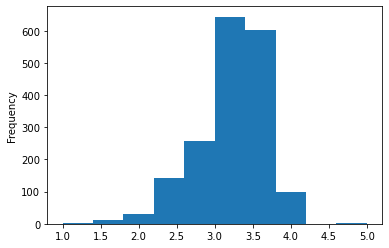

In [32]:
choc['Rating'].plot(kind="hist", bins=10)

<AxesSubplot:ylabel='Frequency'>

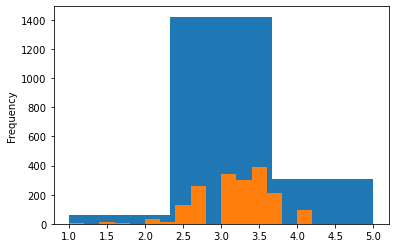

In [33]:
#    ii. Looking good! Let's see how granular we can get
#        Modify the number of bins to change how ranges are distributed
choc['Rating'].plot(kind="hist", bins=3)
choc['Rating'].plot(kind="hist", bins=20)

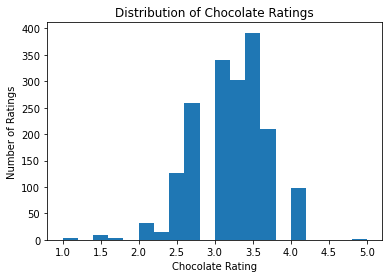

In [34]:
#    iii. Now, let's add some descriptive labels to our chart using matplotlib
choc['Rating'].plot(kind='hist', bins=20)
plt.ylabel('Number of Ratings')
plt.xlabel('Chocolate Rating')
plt.title('Distribution of Chocolate Ratings');

### 9.4 Scatter Plots

In [35]:
choc.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


<AxesSubplot:xlabel='Review\nDate', ylabel='Rating'>

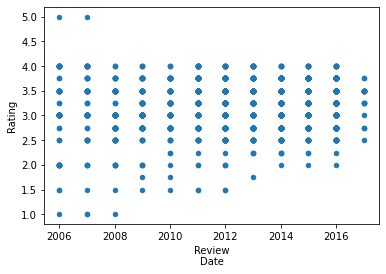

In [36]:

# A. Is there a connection between Review Date and Rating? Plot them with a scatter plot
choc.plot(kind="scatter", x="Review\nDate", y="Rating" )
# Why is this graph not so helpful?

In [37]:
# let's clean up the Cocoa Percent column (it's currently a string and we want it to be a float)
choc["Cocoa\nPercent"].head()

0    63%
1    70%
2    70%
3    70%
4    70%
Name: Cocoa\nPercent, dtype: object

In [38]:
choc['cocoa-clean']=choc["Cocoa\nPercent"].str.strip('%')

In [39]:
choc['cocoa-clean'].head()[0]

'63'

In [40]:
choc['cocoa-clean-int']=pd.to_numeric(choc['cocoa-clean'])

In [41]:
# okay now it's a float
choc['cocoa-clean-int'].dtype

dtype('float64')

<AxesSubplot:xlabel='cocoa-clean-int', ylabel='Review\nDate'>

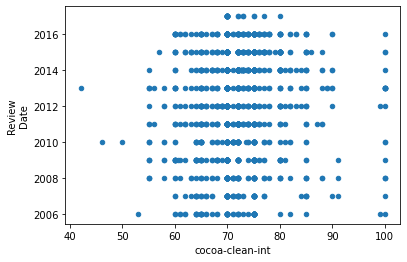

In [42]:
# let's use it to make a scatterplot
choc.plot(kind="scatter", x='cocoa-clean-int', y="Review\nDate" )

<AxesSubplot:xlabel='cocoa-clean-int', ylabel='Rating'>

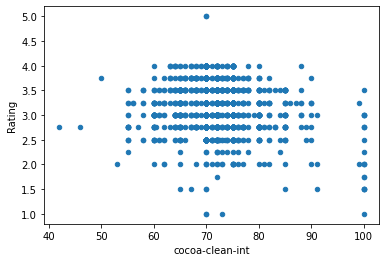

In [43]:
# let's use it to make another scatterplot
choc.plot(kind="scatter", x='cocoa-clean-int', y="Rating" )

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

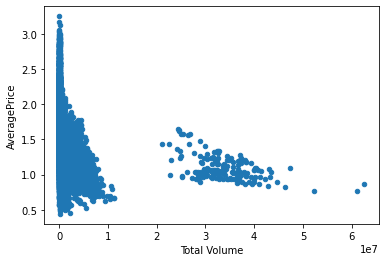

In [44]:
# B. Explore this new dataframe, then scatter plot correlation between Total Volume and AveragePrice
avo = pd.read_csv('data/datasets/avocado.csv')
avo.plot(kind='scatter', x='Total Volume', y='AveragePrice')

### 9.5 Visualizations to Hypotheses

In [45]:
# Create visualizations around any of the above datasets or our superstore datasets
# For at least one of the visualizations, attach a hypothesis or specific claim the chart supports